In [48]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import sys
import taurex.log
taurex.log.disableLogging()

from taurex.model import TransmissionModel
from taurex.planet import Planet
from taurex.stellar import BlackbodyStar
from taurex.chemistry import TaurexChemistry, ConstantGas
from taurex.temperature import Guillot2010

In [49]:
#cross-sections

from taurex.cache import OpacityCache,CIACache

OpacityCache().clear_cache()
OpacityCache().set_opacity_path("/home/silvia/Desktop/Magistrale/Esami_da_dare/Computational_astrophysics/Taurex/data/xsecs")
CIACache().set_cia_path("/home/silvia/Desktop/Magistrale/Esami_da_dare/Computational_astrophysics/Taurex/data/cia/hitran")




In [50]:
# Define the planetary parameters
planet_radius = 1.27  # Jupiter radii
planet_mass=0.46       #Jupyter masses
star_radius = 0.79    # Solar radii
T_irr = 1200.0        # Irradiation temperature (K)
T_star = 5700.0       # Stellar temperature (K)

# Create temperature profile
guillot = Guillot2010(T_irr=T_irr)

# Create a planet instance
planet = Planet(planet_radius=planet_radius, planet_mass=planet_mass)  

# Create a star instance
star = BlackbodyStar(temperature=T_star, radius=star_radius)

In [51]:
guillot = Guillot2010(T_irr=1200.0)

guillot.T_irr

1200.0

In [52]:
chemistry = TaurexChemistry()
# Define and randomize gas abundances for H2O, CH4, CO2, and CO
gases = ['H2O', 'CH4', 'CO2', 'CO']
for gas_name in gases:
    abundance = 10**np.random.uniform(-8, -2)  # Randomize abundance within the specified range
    chemistry.addGas(ConstantGas(gas_name, mix_ratio=abundance))

In [53]:
from taurex.model import TransmissionModel
tm = TransmissionModel(planet=planet, temperature_profile=guillot, chemistry=chemistry,star=star,   atm_min_pressure=1e-0,atm_max_pressure=1e6, nlayers=30)

In [54]:
from taurex.contributions import AbsorptionContribution
tm.add_contribution(AbsorptionContribution())

In [55]:
from taurex.contributions import RayleighContribution
tm.add_contribution(RayleighContribution())

In [56]:
tm.build()

res = tm.model()
res

(array([  199.99326855,   200.00660143,   200.01993521, ...,
        33328.88933329, 33331.11125925, 33333.33333333]),
 array([0.03037238, 0.03051619, 0.03085456, ..., 0.03063363, 0.03063376,
        0.03063389]),
 array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         5.30990117e-252, 4.48627851e-252, 3.79021697e-252],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         3.47416875e-160, 3.12174929e-160, 2.80498941e-160],
        ...,
        [9.96740413e-001, 9.94069506e-001, 9.99861620e-001, ...,
         9.96048561e-001, 9.96047412e-001, 9.96046263e-001],
        [9.98359450e-001, 9.95909794e-001, 9.99925922e-001, ...,
         9.97798259e-001, 9.97797618e-001, 9.97796977e-001],
        [9.99324888e-001, 9.98046589e-001, 9.99967468e-001, ...,
         9.99045964e-001, 9.99045686e-001, 9.99045409e-001]]),
 None)

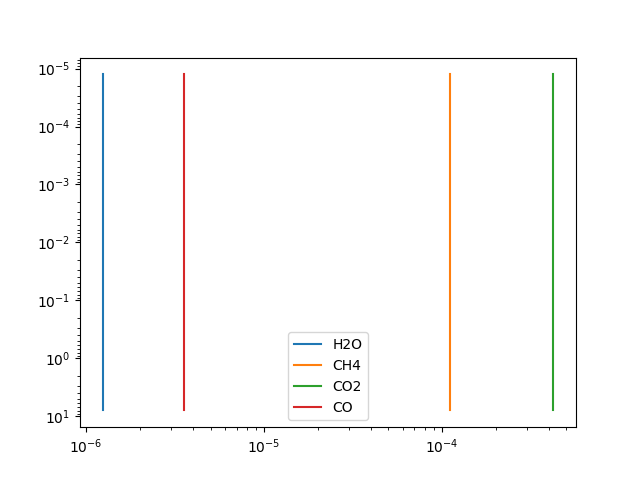

In [57]:
plt.figure()

for x,gasname in enumerate(tm.chemistry.activeGases):
    
    plt.plot(tm.chemistry.activeGasMixProfile[x],tm.pressureProfile/1e5,label=gasname)
#for x,gasname in enumerate(tm.chemistry.inactiveGases):
    
 #   plt.plot(tm.chemistry.inactiveGasMixProfile[x],tm.pressureProfile/1e5,label=gasname)
plt.gca().invert_yaxis()
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

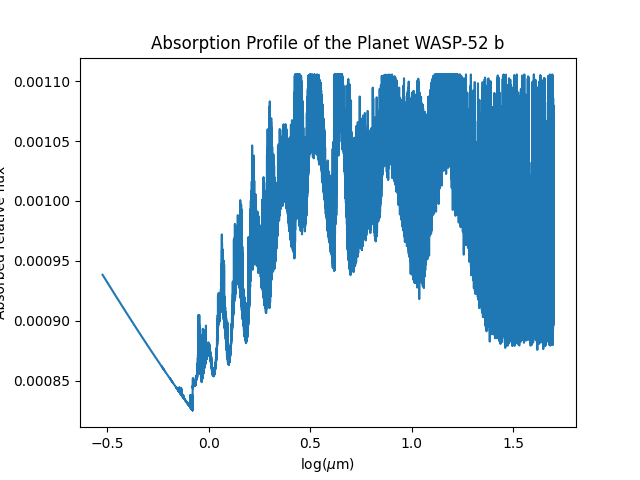

In [67]:
native_grid, rprs, tau, _ = res

full_fig = plt.figure()
plt.plot(np.log10(10000/native_grid),rprs**2) #in micrometers, absorptio
#plt.plot((native_grid)**-1,rprs)
plt.title('Absorption Profile of the Planet WASP-52 b')
plt.xlabel('log($\mu$m)')
#plt.xlim([2.5,5.1])
plt.ylabel('Absorbed relative flux')
plt.show()

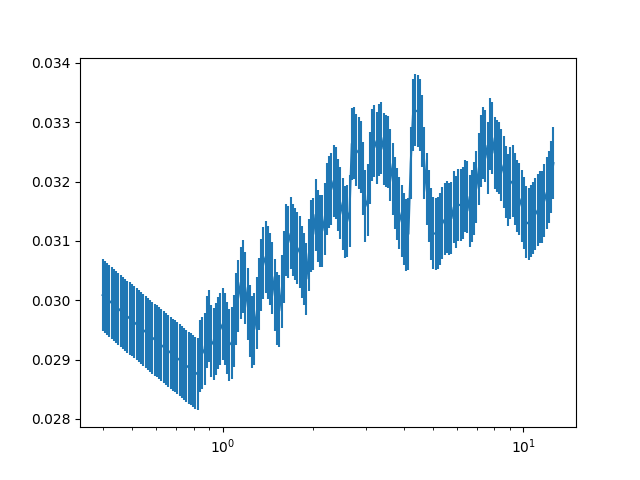

()


In [84]:
from taurex.binning import FluxBinner,SimpleBinner
binned_fig = plt.figure()


#Make a logarithmic grid
wngrid = np.sort(10000/np.logspace(-0.4,1.1,200))
bn = SimpleBinner(wngrid=wngrid)

bin_wn, bin_rprs,_,_  = bn.bin_model(tm.model(wngrid=wngrid))

error=np.std(bin_rprs)/2

plt.errorbar(10000/bin_wn,bin_rprs,error)
plt.xscale('log')
plt.show()


print(np.shape(error))

In [90]:
# Convert the native grid (wavenumber) to wavelength in microns
wavelength = 10000 / native_grid  # Convert from cm^-1 to microns

# Calculate (Rp/Rs)^2 and sqrt((Rp/Rs)^2)
rprs_squared = bin_rprs
rprs_sqrt = [error]*len(bin_rprs)

print(np.shape(rprs_sqrt))

# Combine the data into a single array
spectrum_data = np.column_stack((bin_wn , rprs_squared, rprs_sqrt))

# Save the data to a file
planet_name = "WASP-52b"  # Replace with your planet's name
file_name = f"{planet_name}_assignment3_taskA_spectrum.dat"
np.savetxt(file_name, spectrum_data, header="Wavelength(micron) (Rp/Rs)^2 sqrt((Rp/Rs)^2)", fmt="%.6e")

print(f"Spectrum saved to {file_name}")

(200,)
Spectrum saved to WASP-52b_assignment3_taskA_spectrum.dat
